In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Dataset

In [2]:
df=pd.read_csv("C:/Users/jyoti/OneDrive/Desktop/IMARTICUS/MACHINE LEARNING/House_Rent_Dataset.csv")

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.shape
# rows=4746 , column=12

(4746, 12)

In [5]:
### Preprocessing Steps
# 1) Handling Null-Values
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### Create a function to return Count of Null Values and Percentage of Null Value and each Feature.

In [6]:
def Null_Count_percentage(df):
    null_value=df.isnull().sum()
    null_value_df=pd.DataFrame({"Feature":null_value.index,"Count_Null":null_value.values,"Percentage_null":(null_value.values/df.shape[0])*100})
    null_value_df=null_value_df.sort_values("Percentage_null",ascending=False)
    return null_value_df

In [7]:
null_value_df=Null_Count_percentage(df)
null_value_df

,Feature,Count_Null,Percentage_null
0,Posted On,0,0.0
1,BHK,0,0.0
2,Rent,0,0.0
3,Size,0,0.0
4,Floor,0,0.0
5,Area Type,0,0.0
6,Area Locality,0,0.0
7,City,0,0.0
8,Furnishing Status,0,0.0
9,Tenant Preferred,0,0.0


In [8]:
### 2) Checking Duplicates
df.duplicated().sum()

0

In [9]:
### 3) Check Data Type
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [10]:
df["Posted On"]=pd.to_datetime(df["Posted On"])

In [11]:
df.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                          int64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
dtype: object

In [12]:
# dt=datetime
# Extracting Year and Month
df["Year_Posted"]=df["Posted On"].dt.year
df["Month_Posted"]=df["Posted On"].dt.month

In [13]:
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year_Posted,Month_Posted
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,4
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent,2022,6
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent,2022,6
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent,2022,6
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,2022,6


In [14]:
df["Floor"].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [15]:
# Extracting floor number and floor count.
# 16 out of 19
# 1
# Upper Basement ouyt of 5
# Lower Basement out of 1
# Ground out of 27
def extract_floor_num(x):
    if len(x)==1:
        return x
    else:
        r=x.split()
        return r[0]
    

In [16]:
df["Floor_Num"]=df["Floor"].apply(extract_floor_num)
df["Floor_Num"].value_counts()

Floor_Num
1         1161
2          945
Ground     927
3          512
4          272
5          164
6           93
7           74
10          67
8           66
9           65
12          47
11          43
15          41
14          34
18          26
Upper       23
17          22
16          21
19          16
13          15
20          12
25          12
Lower       11
23           9
24           6
21           6
30           5
34           4
28           4
35           3
65           3
22           3
26           3
32           3
60           3
27           3
40           2
53           2
45           2
36           2
48           2
29           1
49           1
50           1
39           1
46           1
41           1
44           1
33           1
37           1
47           1
43           1
76           1
Name: count, dtype: int64

In [20]:
df["Floor_Num"]=df["Floor_Num"].replace({"Ground":0,"Upper":-1,"Lower":-2})
df["Floor_Num"].value_counts()
df["Floor_Count"]=df["Floor_Count"].replace({"Ground":0})
df["Floor_Count"].value_counts()

Floor_Count
4     938
3     915
2     868
5     422
1     335
     ... 
39      1
62      1
59      1
66      1
0       1
Name: count, Length: 67, dtype: int64

In [18]:
def extract_Total_Floor_Count(x):
    if len(x)==1:
        return x
    else:
        r=x.split()
        return r[-1]

In [19]:
df["Floor_Count"]=df["Floor"].apply(extract_Total_Floor_Count)
df["Floor_Count"].value_counts()

Floor_Count
4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: count, Length: 67, dtype: int64

In [22]:
df["Floor_Num"]=df["Floor_Num"].astype("int")
df["Floor_Count"]=df["Floor_Count"].astype("int")

In [23]:
df.dtypes

Posted On            datetime64[ns]
BHK                           int64
Rent                          int64
Size                          int64
Floor                        object
Area Type                    object
Area Locality                object
City                         object
Furnishing Status            object
Tenant Preferred             object
Bathroom                      int64
Point of Contact             object
Year_Posted                   int32
Month_Posted                  int32
Floor_Num                     int32
Floor_Count                   int32
dtype: object

In [24]:
df.drop(["Posted On","Floor"],axis=1,inplace=True) # inplace true for pemanent changes in the data

In [25]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Year_Posted', 'Month_Posted', 'Floor_Num', 'Floor_Count'],
      dtype='object')

In [26]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year_Posted,Month_Posted,Floor_Num,Floor_Count
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,1,2


#### Separate Number and Category Features

In [27]:
num_cols=df.dtypes[df.dtypes!='object'].index
cat_cols=df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['BHK', 'Rent', 'Size', 'Bathroom', 'Year_Posted', 'Month_Posted',
       'Floor_Num', 'Floor_Count'],
      dtype='object')
Index(['Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object')


In [28]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year_Posted,Month_Posted,Floor_Num,Floor_Count
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2022,5,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2022,7,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,1,2


In [29]:
for i in cat_cols:
    print(i,df[i].nunique())

Area Type 3
Area Locality 2235
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


### EDA
#### univariate , Bi-variate


#### Countplot

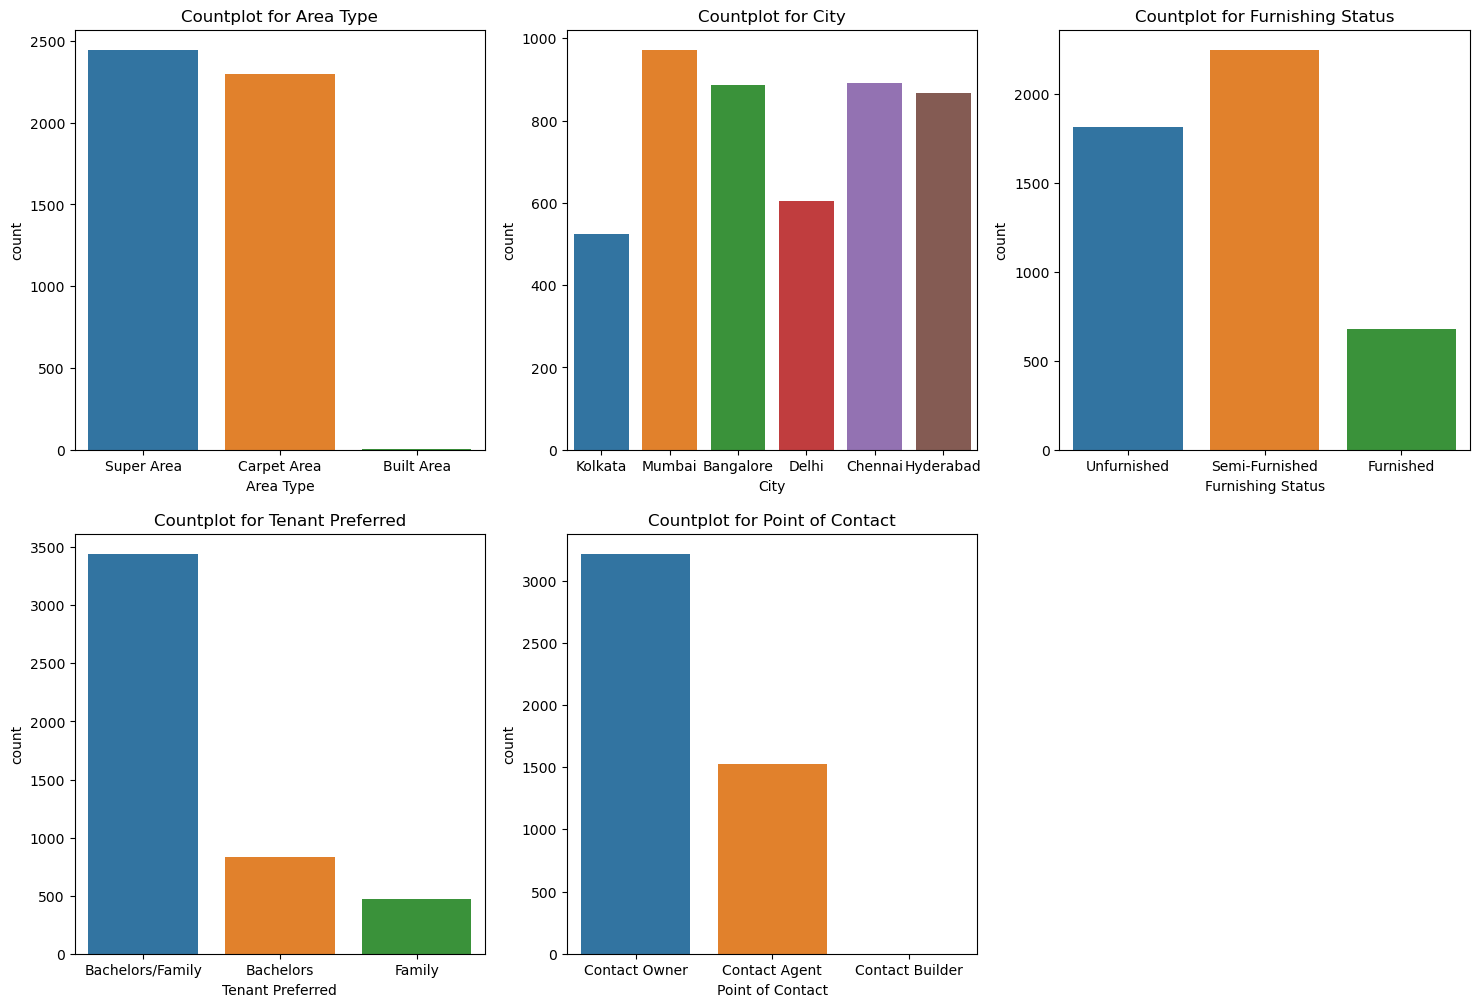

In [30]:
cols=['Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact']
plt.figure(figsize=(18,12))
for i in range(len(cols)):                          # i=0,1,2,3,4
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

### Boxplot

In [31]:
df.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
Year_Posted           int32
Month_Posted          int32
Floor_Num             int32
Floor_Count           int32
dtype: object

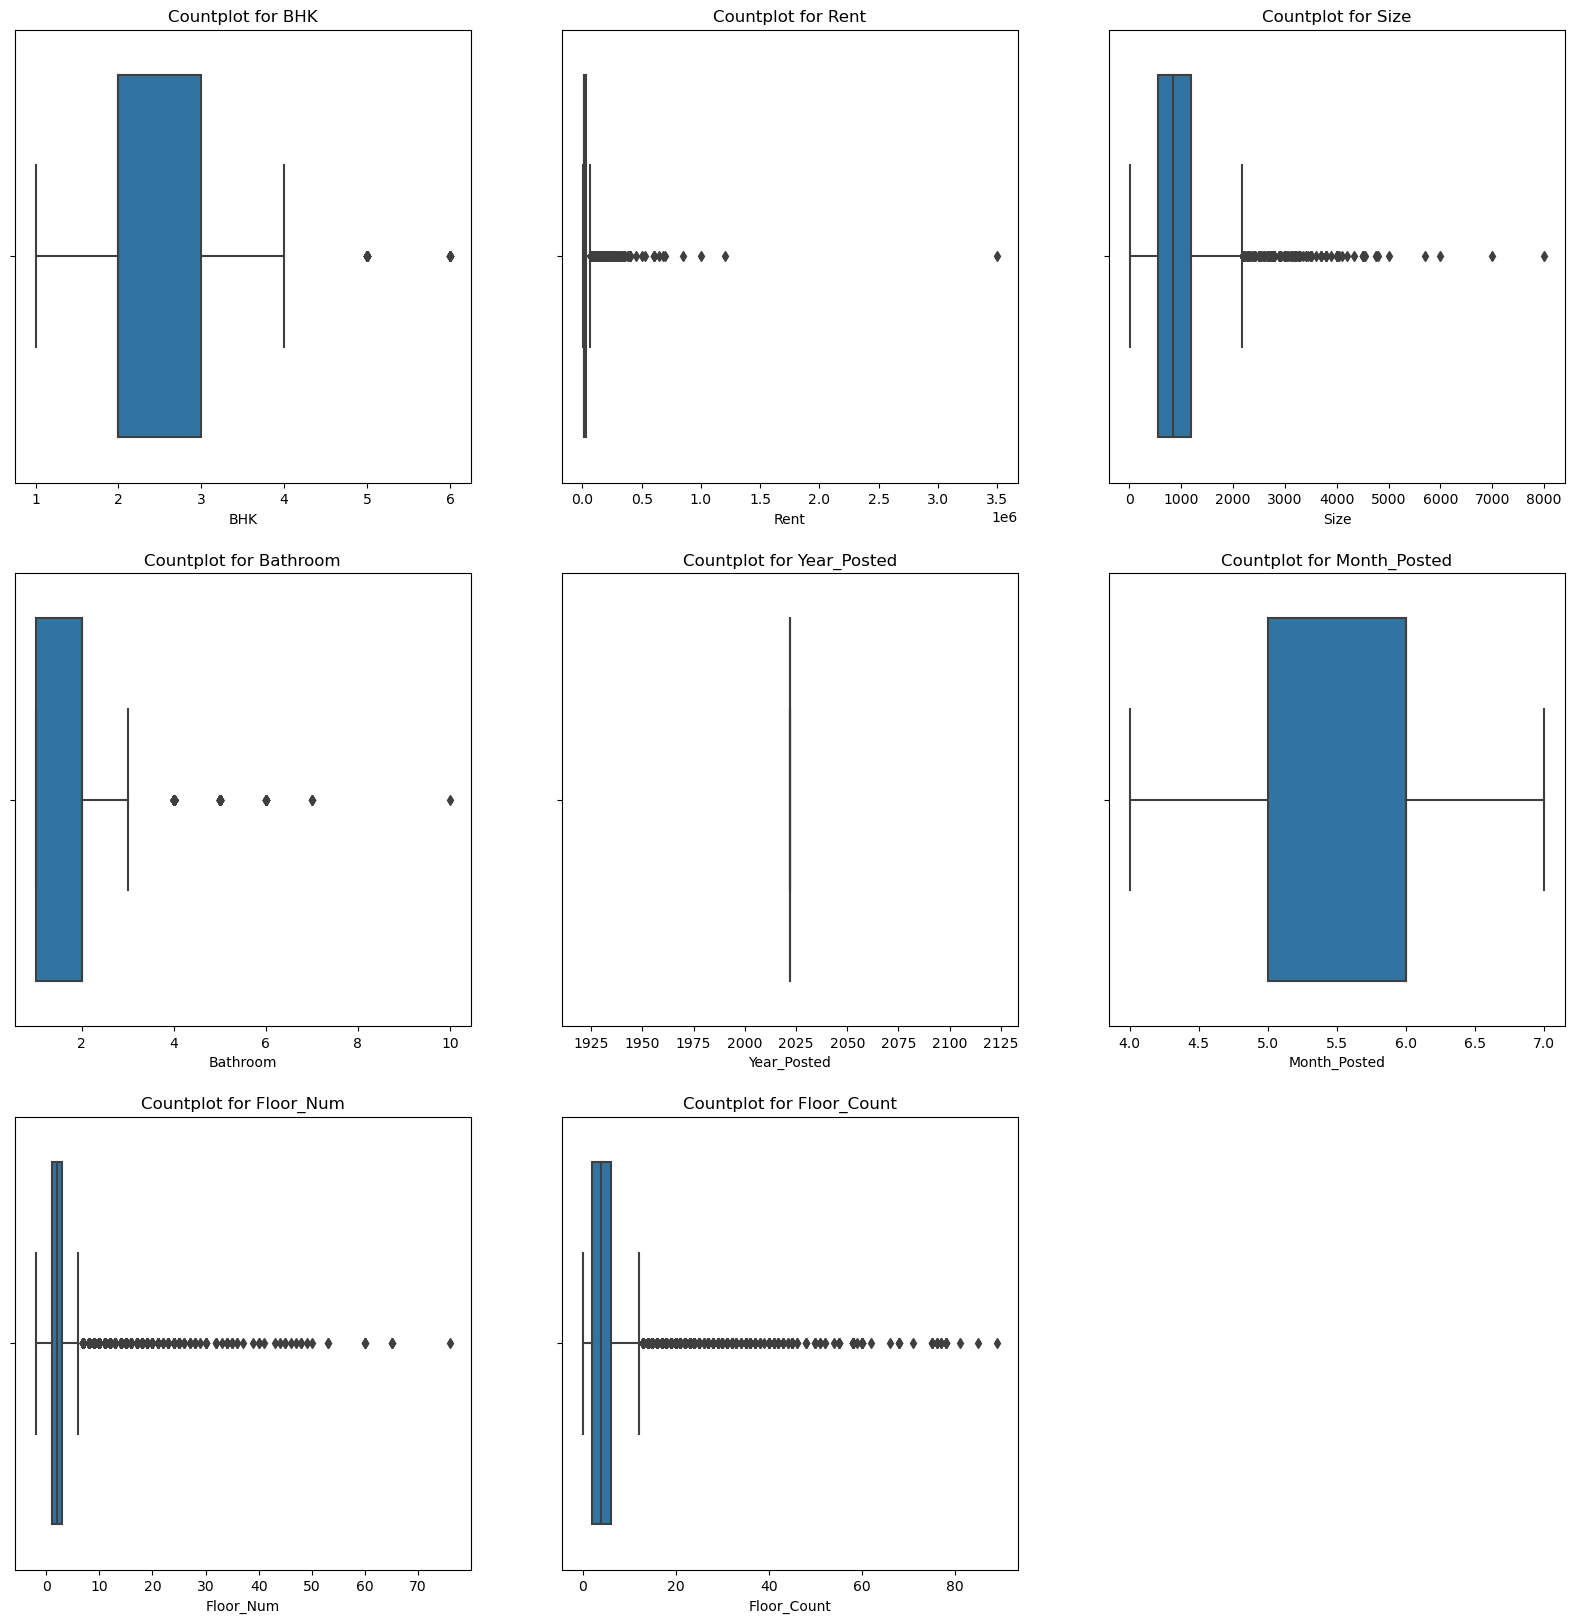

In [32]:
num_cols=['BHK', 'Rent', 'Size', 'Bathroom', 'Year_Posted', 'Month_Posted',
       'Floor_Num', 'Floor_Count']
plt.figure(figsize=(20,20))
for i in range(len(num_cols)):                          # i=0,1,2,3,4
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Countplot for {num_cols[i]}')
plt.show()

In [33]:
df['Year_Posted'].value_counts()

Year_Posted
2022    4746
Name: count, dtype: int64

In [34]:
df.drop(['Year_Posted','Area Locality'],axis=1,inplace=True)
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact', 'Month_Posted',
       'Floor_Num', 'Floor_Count'],
      dtype='object')

In [35]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact', 'Month_Posted',
       'Floor_Num', 'Floor_Count'],
      dtype='object')

### Correlation

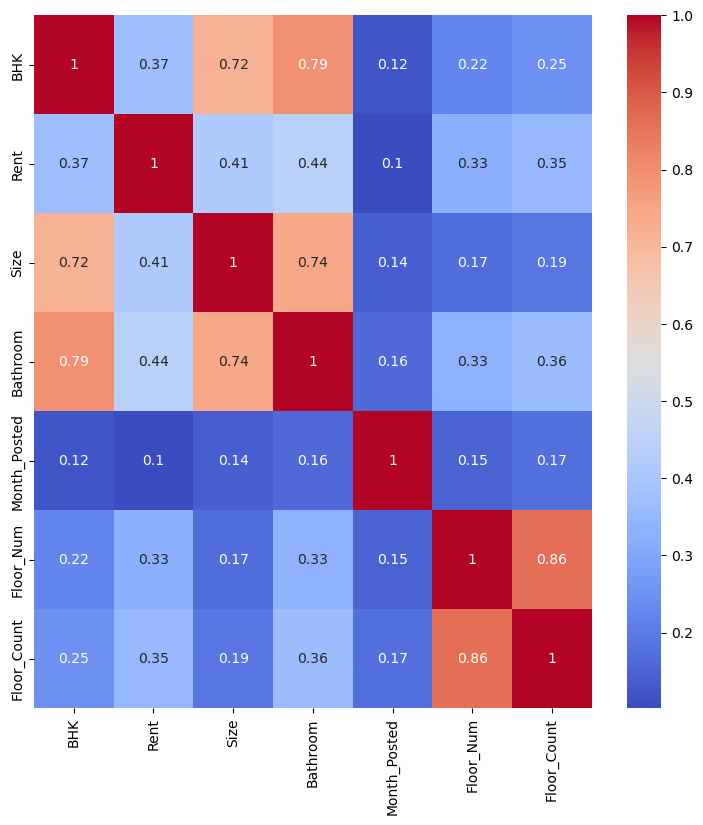

In [36]:
df_num = df.select_dtypes('int')
corr=df_num.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')   # annot= Annotation
plt.show()

### Outlier Treatment
1) Remove all outliers. >Q3+1.5*IQR or < Q1-(1.5*IQR)<br>
2) Remove extreme outliers.

In [37]:
num_cols
cols=['Rent','Size','Bathroom','Floor_Num','Floor_Count']
a=df[cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a=a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
Rent,1200.0,4000.0,5000.0,6000.0,16000.0,130000.0,180000.00,211000.0,300000.0,3500000.0
Size,10.0,70.0,100.0,200.0,850.0,2000.0,2500.00,2800.0,3289.2,8000.0
Bathroom,1.0,1.0,1.0,1.0,2.0,3.0,4.00,4.0,5.0,10.0
Floor_Num,-2.0,0.0,0.0,0.0,2.0,14.0,17.65,20.0,27.0,76.0
Floor_Count,0.0,1.0,1.0,1.0,4.0,24.0,31.00,37.0,51.0,89.0


In [38]:
b1=np.array([10,20,30,40,25,35,45])
print(b1)
b2=np.where(b1%2==0,b1+10,b1-7)
# if b1 is divisible by 2 , then b1+10 else b1-7
print(b2)

[10 20 30 40 25 35 45]
[20 30 40 50 18 28 38]


In [39]:
df1=df.copy()

In [40]:
# df['Rent']=np.where(df['Rent']>300000,300000,df['Rent'])
df['Rent']=np.where(df['Rent']<4000,4000,df['Rent'])        # Upper end outliers
df['Size']=np.where(df['Size']<70,70,df['Size'])                # Lower end outliers

In [41]:
# def outliers_treatment_lower(x):
# x=x.clip(lower=x.quantile(0.01))        # clip=Replace
# return x

In [42]:
def outliers_treatment(x):
    x=x.clip(upper=x.quantile(0.99))        # clip=Replace
    return x

In [43]:
cols=['Rent','Size','Bathroom','Floor_Num','Floor_Count']
df[cols]=df[cols].apply(outliers_treatment)

### Encode Categorical Features

In [44]:
cat_cols=df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [45]:
for i in cat_cols:
    print(i,df[i].nunique())

Area Type 3
City 6
Furnishing Status 3
Tenant Preferred 3
Point of Contact 3


In [46]:
df_dum=pd.get_dummies(data=df,columns=cat_cols,drop_first=True,dtype=int)
print(df_dum.shape)
df_dum.columns

(4746, 20)


Index(['BHK', 'Rent', 'Size', 'Bathroom', 'Month_Posted', 'Floor_Num',
       'Floor_Count', 'Area Type_Carpet Area', 'Area Type_Super Area',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner'],
      dtype='object')

#### Select x and y

In [47]:
x=df_dum.drop(['Rent','Month_Posted'],axis=1)      # independent features
y=df_dum['Rent']                  # dependent features / target
print(x.shape)     # df
print(y.shape)     # Series

(4746, 18)
(4746,)


In [4]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [48]:
# No missing values
# no/min outliers
# Multicolinearity - VIF
# target vra is normallly distributed

### Check Multicolineraity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]   # i=0,1,2,3
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,BHK,25.680781
2,Bathroom,25.116766
6,Area Type_Super Area,18.705074
5,Area Type_Carpet Area,14.659390
1,Size,10.911196
4,Floor_Count,7.179378
17,Point of Contact_Contact Owner,6.442403
14,Tenant Preferred_Bachelors/Family,6.094794
3,Floor_Num,5.693691
12,Furnishing Status_Semi-Furnished,4.470279


### Dependent Variable is Normally Distributed or not

In [51]:
df.shape

(4746, 12)

In [52]:
from scipy.stats import shapiro
# Ho: Data is normally Distributed       => p>0.05
# H1: Data is not normally Distributed   => p<=0.05

In [53]:
print(shapiro(df_dum['Rent']))              # test_stat, p
print(shapiro(np.log(df_dum['Rent'])))

ShapiroResult(statistic=0.5475691556930542, pvalue=0.0)
ShapiroResult(statistic=0.9468694925308228, pvalue=2.3573553610873884e-38)


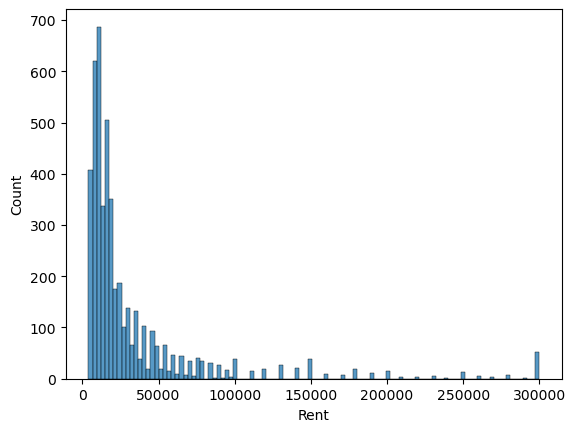

In [54]:
sns.histplot(df_dum['Rent'])
plt.show()

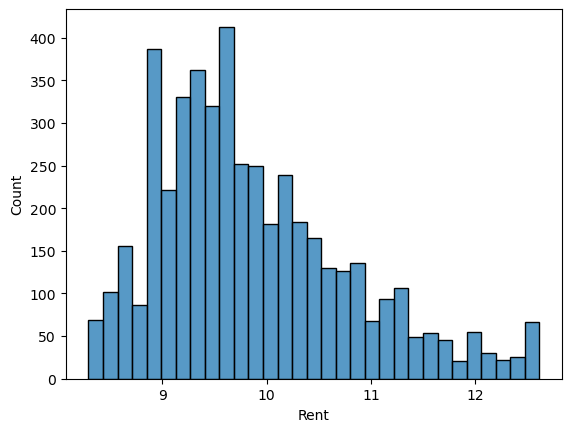

In [60]:
sns.histplot(np.log(df_dum['Rent']))
plt.show()

## OLS Model

In [61]:
import statsmodels.api as sm

In [63]:
x1=x.copy()
y1=y.copy()

In [64]:
x1=sm.add_constant(x1)
ols_m1=sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     446.9
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:33:45   Log-Likelihood:                -55515.
No. Observations:                4746   AIC:                         1.111e+05
Df Residuals:                    4727   BIC:                         1.112e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.004e+04   2.08e+04     -0.966      0.334   -6.07e+04    2.06e+04
BHK                                1884.0384    955.669      1.971      0.049      10.482    3757.595
Size                                 27.2297      1.243     21.903      0.000      24.793      29.667
Bathroom                           1.282e+04    990.168     12.951      0.000    1.09e+04    1.48e+04
Floor_Num                           353.0570    173.556      2.034      0.042      12.806     693.308
Floor_Count                         624.2956    103.351      6.041      0.000     421.679     826.912
Area Type_Carpet Area             -2575.2825   2.07e+04     -0.125      0.901   -4.31e+04    3.79e+04
Area Type_Super Area              -4677.0683   2.06e+04     -0.227      0.821   -4.51e+04    3.58e+04
City_Chennai                      -3017.8346   1405.977     -2.146      0.032   -5774.204    -261.465
City_Delhi                         1.022e+04   1612.308      6.336      0.000    7054.407    1.34e+04
City_Hyderabad                    -1.073e+04   1429.277     -7.505      0.000   -1.35e+04   -7924.395
City_Kolkata                       1816.3262   1690.837      1.074      0.283   -1498.502    5131.154
City_Mumbai                        3.789e+04   1753.756     21.606      0.000    3.45e+04    4.13e+04
Furnishing Status_Semi-Furnished  -9253.5495   1299.561     -7.121      0.000   -1.18e+04   -6705.804
Furnishing Status_Unfurnished     -8434.0547   1349.939     -6.248      0.000   -1.11e+04   -5787.545
Tenant Preferred_Bachelors/Family  2999.7221   1228.292      2.442      0.015     591.697    5407.748
Tenant Preferred_Family           -4732.4560   1734.103     -2.729      0.006   -8132.107   -1332.805
Point of Contact_Contact Builder   1.918e+04   2.92e+04      0.656      0.512   -3.81e+04    7.65e+04
Point of Contact_Contact Owner    -7095.6125   1307.259     -5.428      0.000   -9658.449   -4532.776
==============================================================================
Omnibus:                     2848.824   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41600.641
Skew:                           2.605   Prob(JB):                         0.00
Kurtosis:                      16.536   Cond. No.                     9.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
print('OLS_M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

OLS_M1
0.6298795563521852
0.6284701702752525


In [66]:
feat_with_high_p_val=ols_m1.pvalues[ols_m1.pvalues>0.05]
feat_with_high_p_val

const                               0.334209
Area Type_Carpet Area               0.900789
Area Type_Super Area                0.820725
City_Kolkata                        0.282780
Point of Contact_Contact Builder    0.511560
dtype: float64

#### Drop Features with high p-value(p-val>0.05)

In [67]:
x2=x.drop('Area Type_Super Area',axis=1)
y2=np.log(y)
print(x2.shape)
print(x2.columns)
print(y2.shape)

(4746, 17)
Index(['BHK', 'Size', 'Bathroom', 'Floor_Num', 'Floor_Count',
       'Area Type_Carpet Area', 'City_Chennai', 'City_Delhi', 'City_Hyderabad',
       'City_Kolkata', 'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner'],
      dtype='object')
(4746,)


## OLS MODEL 2

In [68]:
x2=sm.add_constant(x2)
ols_m2=sm.OLS(y2,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1277.
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:33:57   Log-Likelihood:                -2252.8
No. Observations:                4746   AIC:                             4542.
Df Residuals:                    4728   BIC:                             4658.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 8.9656      0.034    261.626      0.000       8.898       9.033
BHK                                   0.1929      0.013     15.101      0.000       0.168       0.218
Size                                  0.0004   1.66e-05     26.905      0.000       0.000       0.000
Bathroom                              0.1746      0.013     13.192      0.000       0.149       0.201
Floor_Num                             0.0033      0.002      1.439      0.150      -0.001       0.008
Floor_Count                           0.0054      0.001      3.902      0.000       0.003       0.008
Area Type_Carpet Area                 0.0392      0.015      2.689      0.007       0.011       0.068
City_Chennai                         -0.0348      0.019     -1.851      0.064      -0.072       0.002
City_Delhi                            0.1936      0.022      8.983      0.000       0.151       0.236
City_Hyderabad                       -0.1500      0.019     -7.851      0.000      -0.187      -0.113
City_Kolkata                         -0.2710      0.023    -11.988      0.000      -0.315      -0.227
City_Mumbai                           0.8835      0.023     37.686      0.000       0.838       0.930
Furnishing Status_Semi-Furnished     -0.1891      0.017    -10.889      0.000      -0.223      -0.155
Furnishing Status_Unfurnished        -0.2851      0.018    -15.799      0.000      -0.320      -0.250
Tenant Preferred_Bachelors/Family    -0.0399      0.016     -2.429      0.015      -0.072      -0.008
Tenant Preferred_Family              -0.1147      0.023     -4.948      0.000      -0.160      -0.069
Point of Contact_Contact Builder     -0.4387      0.391     -1.123      0.261      -1.204       0.327
Point of Contact_Contact Owner       -0.3418      0.017    -19.560      0.000      -0.376      -0.308
==============================================================================
Omnibus:                      512.813   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2530.370
Skew:                           0.409   Prob(JB):                         0.00
Kurtosis:                       6.482   Cond. No.                     7.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
print('OLS_M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

print('OLS_M2')
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

OLS_M1
0.6298795563521852
0.6284701702752525
OLS_M2
0.8211344462853629
0.820491317179367


## Linear Regression

In [70]:
x3=x.drop(['Area Type_Super Area','Point of Contact_Contact Builder'],axis=1)
y3=np.log(y)
print(x3.shape)
print(y3.shape)

(4746, 16)
(4746,)


### Split data into train and test

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x3,y3,test_size=0.3,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3322, 16)
(1424, 16)
(3322,)
(1424,)


In [73]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [74]:
def eval_model(ytest,ypred):
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    print("MAE:",mae,"MSE:",mse,"RMSE:",rmse)
    

In [75]:
lr1=LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [76]:
print('Train_Score:',lr1.score(x_train,y_train))      # R2_Score
print('Test_Score:',lr1.score(x_test,y_test))         # R2_Score

Train_Score: 0.8230475790126242
Test_Score: 0.8152711009646035


In [77]:
ypred_lr1=lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE: 0.2954146216993261 MSE: 0.1562791367780347 RMSE: 0.39532156123595724


In [78]:
m_lr1=lr1.coef_
c_lr1=lr1.intercept_
print(m_lr1)
print(c_lr1)

[ 1.85935114e-01  4.75729587e-04  1.69875736e-01  1.72934663e-03
  5.93130605e-03  3.44011378e-02 -3.95063229e-02  1.95167934e-01
 -1.49415658e-01 -2.68040659e-01  8.96067409e-01 -2.08374393e-01
 -3.03907193e-01 -1.86233492e-02 -9.66864766e-02 -3.38640727e-01]
8.96619297614795


In [79]:
# Comparin

## Overfitting an Underfitting




# Ridg Reg

In [80]:
rid1=Ridge(alpha=0.578)
rid1.fit(x_train,y_train)

Ridge(alpha=0.578)

In [81]:
print('Train_Score:',rid1.score(x_train,y_train))      # R2_Score
print('Test_Score:',rid1.score(x_test,y_test)) 

Train_Score: 0.8230470979494565
Test_Score: 0.8152922974000602


# Lasso 

In [82]:
las1=Lasso(alpha=0.785)
las1.fit(x_train,y_train)

Lasso(alpha=0.785)

In [83]:
m_las1=las1.coef_

print(m_las1)

[ 0.          0.00078902  0.          0.          0.04053605  0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.         -0.        ]
